<a href="https://colab.research.google.com/github/harshitha-36/Computer_Vision/blob/main/MV_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(-0.5, 611.5, 365.5, -0.5)

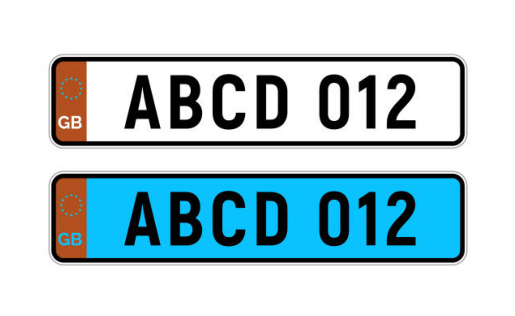

In [ ]:
img = cv2.imread("/content/carplate.jpg")
plt.imshow(img)
plt.axis("off")

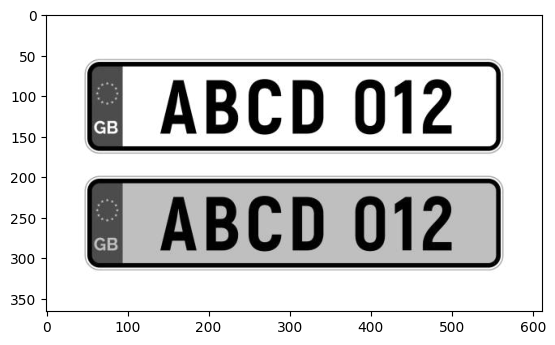

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

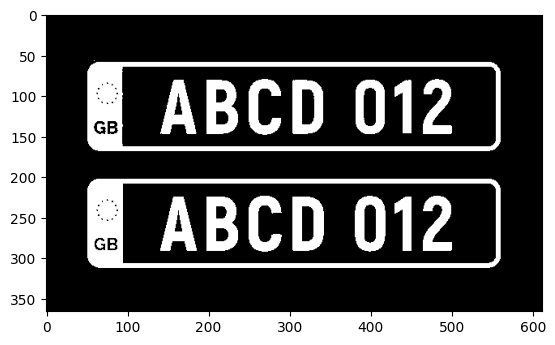

In [ ]:
ret, thresh = cv2.threshold(img_gray, 150,255,0)
image = cv2.bitwise_not(thresh)
plt.imshow(image, cmap='gray')

In [ ]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

In [ ]:
#DIAMOND

kernel4= np.array([[0,0,1,0,0],[0,1,1,1,0],[1,1,1,1,1],[0,1,1,1,0],[0,0,1,0,0]], np.uint8)

In [ ]:
#First
img_erosion1 = cv2.erode(image, kernel1, iterations = 1)
img_dilation1 = cv2.dilate(image, kernel1, iterations = 1)

In [ ]:
#Second
img_erosion2 = cv2.erode(image, kernel2, iterations = 1)
img_dilation2 = cv2.dilate(image, kernel2, iterations = 1)

In [ ]:
#Third
img_erosion3 = cv2.erode(image, kernel3, iterations = 1)
img_dilation3 = cv2.dilate(image, kernel3, iterations = 1)

In [ ]:
#Fourth
img_erosion4 = cv2.erode(image, kernel4, iterations = 1)
img_dilation4 = cv2.dilate(image, kernel4, iterations = 1)

Text(0.5, 1.0, 'dilation_diamond')

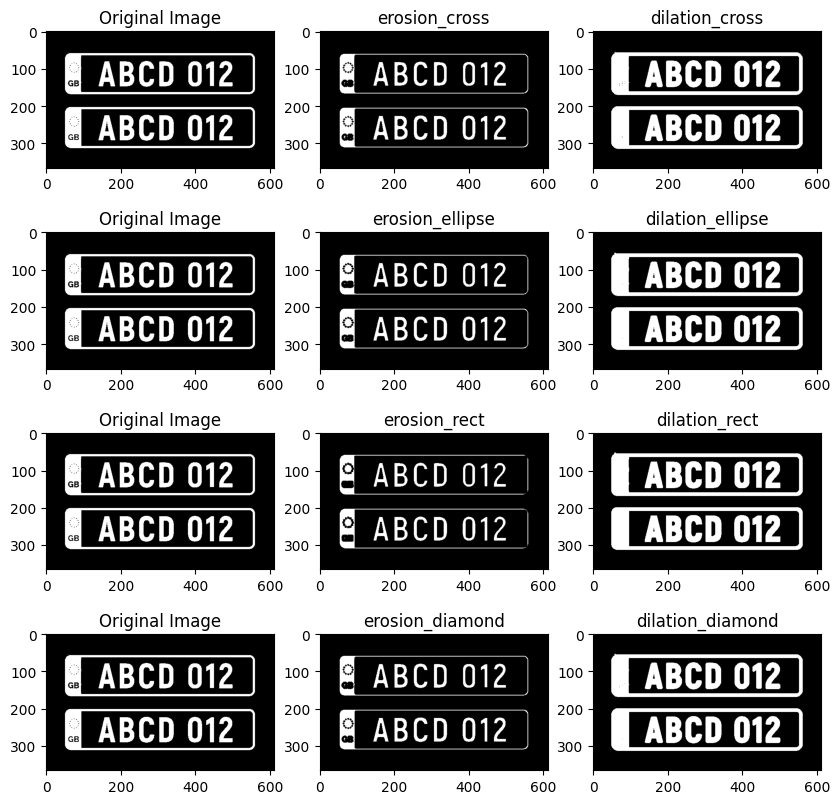

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(4,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(4,3,2)
plt.imshow(img_erosion1, cmap='gray')
plt.title('erosion_cross')
plt.subplot(4,3,3)
plt.imshow(img_dilation1, cmap='gray')
plt.title('dilation_cross')
plt.subplot(4,3,4)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(4,3,5)
plt.imshow(img_erosion2, cmap='gray')
plt.title('erosion_ellipse')
plt.subplot(4,3,6)
plt.imshow(img_dilation2, cmap='gray')
plt.title('dilation_ellipse')
plt.subplot(4,3,7)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(4,3,8)
plt.imshow(img_erosion3, cmap='gray')
plt.title('erosion_rect')
plt.subplot(4,3,9)
plt.imshow(img_dilation3, cmap='gray')
plt.title('dilation_rect')
plt.subplot(4,3,10)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(4,3,11)
plt.imshow(img_erosion4, cmap='gray')
plt.title('erosion_diamond')
plt.subplot(4,3,12)
plt.imshow(img_dilation4, cmap='gray')
plt.title('dilation_diamond')

In [ ]:
Task 2: Perform segmentation of the COIN image using watershed algorithm. Prepare the input image suitable for watershed algorithm to work namely
a) conversion to binary
b) performing morphological operations to remove noises
c) determine the markers for initializing the seed point for the image. Finally display the segmented output namely coins in different colors.

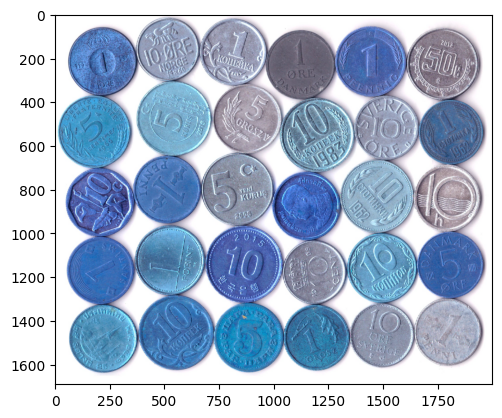

In [ ]:
img = cv2.imread("/content/coin9.jpg")
plt.imshow(img)

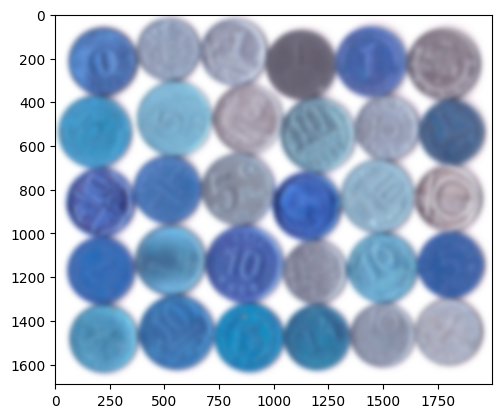

In [ ]:
blur = cv2.GaussianBlur(img, (75,75), 0)
plt.imshow(blur)

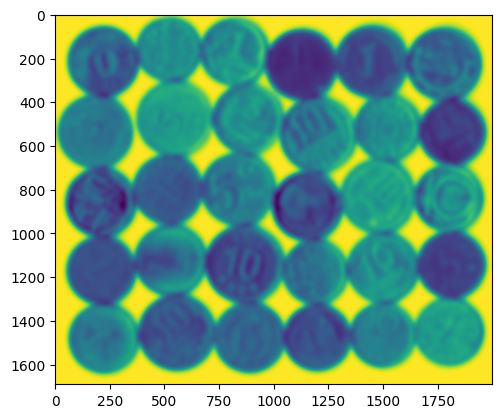

In [ ]:
#image grayscale conversion
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

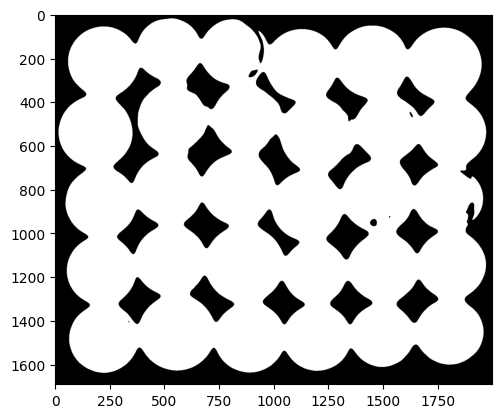

In [ ]:
#Threshold Processing
ret, bin_img = cv2.threshold(gray,
							0, 255,
							cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#imshow(bin_img)
plt.imshow(bin_img, cmap='gray')

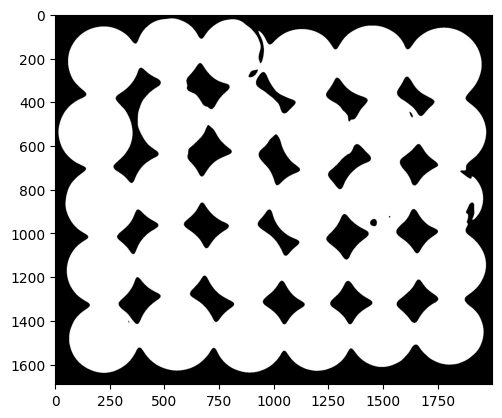

In [ ]:
# noise removal
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_img = cv2.morphologyEx(bin_img,
						cv2.MORPH_OPEN,
						kernel,
						iterations=1)
plt.imshow(bin_img, cmap='gray')


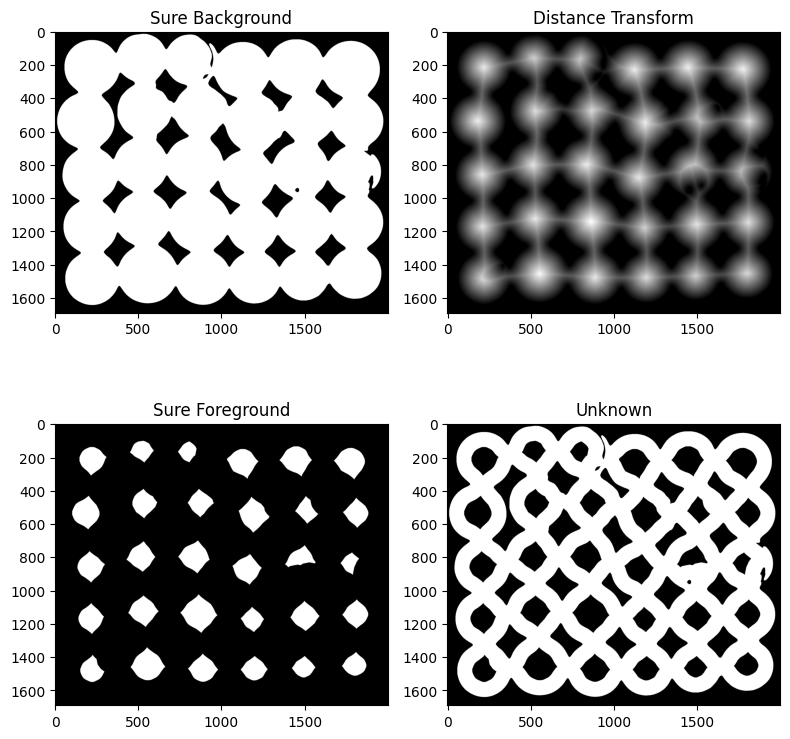

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np  # Assuming numpy is needed for array operations

# Create the figure
fig = plt.figure(figsize=(8, 8))

# Sure background area
sure_bg = cv2.dilate(bin_img, kernel, iterations=3)

# Plot 1: Sure Background
plt.subplot(2, 2, 1)  # Row 1, Column 1
plt.imshow(sure_bg, cmap='gray')
plt.title('Sure Background')

# Distance transform
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)

# Plot 2: Distance Transform
plt.subplot(2, 2, 2)  # Row 1, Column 2
plt.imshow(dist, cmap='gray')
plt.title('Distance Transform')

# Foreground area
ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)

# Plot 3: Sure Foreground
plt.subplot(2, 2, 3)  # Row 2, Column 1
plt.imshow(sure_fg, cmap='gray')
plt.title('Sure Foreground')

# Unknown area
unknown = cv2.subtract(sure_bg, sure_fg)

# Plot 4: Unknown
plt.subplot(2, 2, 4)  # Row 2, Column 2
plt.imshow(unknown, cmap='gray')
plt.title('Unknown')

plt.tight_layout()
plt.show()



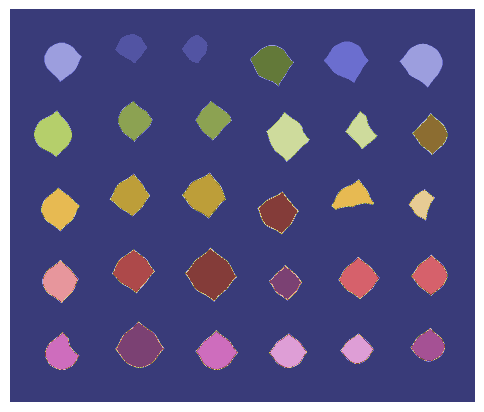

In [ ]:
# Marker labelling
# sure foreground
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()



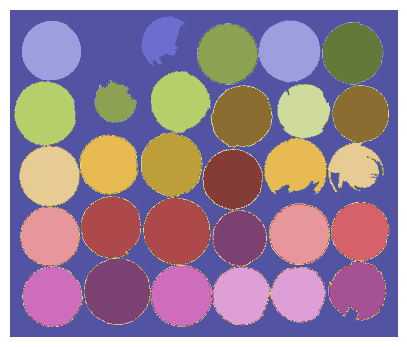

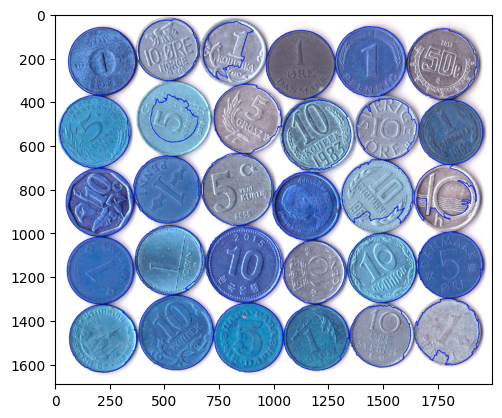

In [ ]:
# watershed Algorithm
markers = cv2.watershed(img, markers)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()


labels = np.unique(markers)

coins = []
for label in labels[2:]:

# Create a binary image in which only the area of the label is in the foreground
#and the rest of the image is in the background
	target = np.where(markers == label, 255, 0).astype(np.uint8)

# Perform contour extraction on the created binary image
	contours, hierarchy = cv2.findContours(
		target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
	)
	coins.append(contours[0])

# Draw the outline
img = cv2.drawContours(img, coins, -1, color=(0, 23, 223), thickness=2)
plt.imshow(img)
